### Install Libraries

In [1]:
# !pip install seaborn matplotlib
# !pip install scikit-learn

In [2]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

2022-01-24 02:03:52.486659: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-01-24 02:03:53.289776: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /device:GPU:0 with 30972 MB memory:  -> device: 0, name: Tesla V100S-PCIE-32GB, pci bus id: 0000:3b:00.0, compute capability: 7.0


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 13873024746874756526,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 32477282304
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 17255866809184623873
 physical_device_desc: "device: 0, name: Tesla V100S-PCIE-32GB, pci bus id: 0000:3b:00.0, compute capability: 7.0"]

### 꽃 판별 CNN Keras

In [3]:
import os
print(os.listdir('./data/Flowers299'))

['Kniphofia', 'ForgetMeNot', 'Zinnia', 'IcelandPoppy', 'Pinks', 'Alchemilla', 'Lavatera', 'Nemophila', 'Linaria', 'Penstemon', 'Celosia', 'Phlox', 'FlannelFlower', 'Clover', 'Dahlia', 'Magnolia', 'Impatiens', 'Clematis', 'Mayflower', 'BabyтАЩsBreath', 'Lupin', 'TeaRose', 'Hosta', 'PersianButtercup', 'PaintedDaisy', 'Bluebonnets', 'ShastaDaisy', 'Geranium', 'Eremurus', 'Heliotrope', 'Photinia', 'Cornflower', 'RockRose', 'Viburnum', 'Hibiscus', 'Snowdrop', 'Silene', 'Dianella', 'Broom', 'Parodia', 'Xerophyllum', 'Quince', 'OrientalPoppy', 'Pansy', 'Columbine', 'Verbena', 'Helenium', 'Candytuft', 'WaxPlant', 'ArmeriaMaritima', 'Chrysanthemum', 'Bergamot', 'Lotus', 'LadyтАЩsSlipper', 'Sage', 'Marigold', 'TigerFlower', 'PincushionFlower', 'Alstroemeria', 'Sedum', 'PeaceLily', 'BalloonFlower', 'CaliforniaPoppy', 'LemonVerbena', 'Sunflower', 'MorningGlory', 'Bouvardia', 'Corydalis', 'PowderPuff', 'PassionFlower', 'Wedelia', 'Winterberry', 'CrownImperial', 'Bellflower', 'Feverfew', 'Clarkia', 

### Importing Various Modules

In [4]:
# GPU 관련
import os
import tensorflow as tf

In [5]:
# warnings 처리를 위함
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [6]:
# 데이터 시각화를 위함
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

In [7]:
# model selection
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, precision_recall_curve, recall_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

In [8]:
# preprocess
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

In [9]:
# keras 관련 라이브러리
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD, Adagrad, Adadelta, RMSprop
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, log_loss, accuracy_score
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import random, PIL

In [10]:
# CNN 관련 모듈
from tensorflow.keras.layers import Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization

### Loading Dataset

In [11]:
labels = ['Abutilon', 'Acacia', 'Aconite', 'AfricanDaisy', 'Agapanthus', 'Ageratum', 'Alchemilla', 'Allium', 'Alstroemeria', 'Alyssum', 'Amaranthus', 'Amaryllis', 'Anemone', 'AniseHyssop', 'ArmeriaMaritima', 'Aster', 'Azalea', "Baby'sBreath", "Bachelor'sButton", 'BalloonFlower', 'Ballota', 'BeeBalm', 'Begonia', 'Bellflower', 'Bergamot', 'Bergenia', 'Billbergia', 'Black-eyedSusan', 'BlanketFlower', 'BlazingStar', 'BleedingHeart', 'Bletilla', 'Blue-eyedGrass', 'Bluebonnets', 'BluestarFlower', 'Borage', 'Bottlebrush', 'Bouvardia', 'Brachyscome', 'Brassica', 'Broom', 'Buttercup', 'ButterflyBush', 'Calceolaria', 'Calendula', 'CaliforniaPoppy', 'CallaLily', 'Camellia', 'Candytuft', 'CannaLily', 'CapeLeadwort', 'CapePrimrose', 'CardinalFlower', 'Carnation', 'Catharanthus', 'Catmint', 'Celosia', 'CerastiumTomentosum', 'Chicory', 'Chionodoxa', 'Chrysanthemum', 'Clarkia', 'Clematis', 'Clover', 'Columbine', 'Coneflower', 'CoralBells', 'CoralVine', 'Coreopsis', 'Cornflower', 'Corydalis', 'Cosmos', 'Cotoneaster', 'Crocosmia', 'Crocus', 'CrownImperial', 'CuckooFlower', 'Cyclamen', 'Daffodil', 'Dahlia', 'Daisy', 'Dandelion', 'Daphne', 'Daylily', 'Decumaria', 'Delphinium', 'DesertRose', 'Deutzia', 'Dianella', 'Dianthusbarbatus', 'Diascia', 'Dietes', 'Dill', 'Disa', 'DutchIris', 'Echinops', 'Echium', 'Elder', 'EnglishBluebell', 'Epimedium', 'Eremurus', 'Erica', 'Erigeron', 'Euphorbia', 'Eustoma', 'EveningPrimrose', 'FallCrocus', 'Feverfew', 'Firethorn', 'FlamingKaty', 'FlannelFlower', 'FlaxFlower', 'FloweringDogwood', 'ForgetMeNot', 'Forsythia', "FourO'clock", 'Foxglove', 'FrangipaniFlower', 'Freesia', 'FrenchMarigold', 'Fuchsia', 'Gaillardia', 'Gardenia', 'Gazania', 'Geranium', 'GerberaFlower', 'Gladiolas', 'Goldenrod', 'GrapeHyacinth', 'Guzmania', 'Hawthorn', 'Heather', 'Hebe', 'Helenium', 'Helichrysum', 'Heliotrope', 'Hellebore', 'Hibiscus', 'Holly', 'Hollyhock', 'Honeysuckle', 'Hosta', 'Hyacinth', 'Hydrangea', 'Hyssop', 'IcelandPoppy','IcePlant', 'Impatiens', 'IpomoeaLobata', 'Iris', 'Ixia', 'Ixora', "Jacob'sLadder", 'Jasmine', 'JohnnyJumpUp', 'KaffirLily', 'Kalmia', 'KangarooPaw', 'Knautia', 'Kniphofia', "Lady'sSlipper", 'Laelia', 'Lantana', 'Larkspur', 'Lavatera', 'Lavender', 'LemonVerbena', 'Lewesia', 'Lilac', 'Lily', 'LilyoftheValley', 'Linaria', 'Lotus', 'LoveintheMist', 'Lunaria', 'Lupin', 'Magnolia', 'MalteseCross', 'Mandevilla', 'MargueriteDaisy', 'Marigold', 'Matthiola', 'Mayflower', 'Meconopsis', 'Mimosa', "Monk'sHood", 'MoonflowerVine', 'Moraea', 'MorningGlory', 'MossRose', 'Narcissus', 'Nasturtium', 'Nemesia', 'Nemophila', 'Neoregelia', 'Nerine', 'NewZealandTeaTree', 'Nierembergia', 'Nolana', 'Oleander', 'Olearia', 'Orchid', 'OrientalLily', 'OrientalPoppy', 'OrnamentalCherry', 'Ornithogalum', 'Osteospermum', 'Oxalis', 'OxeyeDaisy', 'OysterPlant', 'PaintedDaisy', 'Pansy', 'Parodia', 'PassionFlower', 'PeaceLily', 'Pelargonium', 'Penstemon', 'Peony', 'Periwinkle', 'PersianButtercup', 'Petunia', 'Phlox', 'Photinia', 'Physostegia', 'PincushionFlower', 'Pinks', 'Poinsettia', 'Polyanthus', 'Poppy', 'Potentilla', 'PowderPuff', 'QuakerLadies', "Queen'sCup", 'QueenoftheMeadow', 'Quince', 'RainLily', 'RockRose', 'Rondeletia', 'RoseofSharon', 'Roses', 'Sage', 'SaintJohn_셲Wort', 'Scaevola', 'ScentedGeranium', 'Scilla', 'Sedum', 'ShastaDaisy', 'Silene', 'Snapdragon', 'Snowdrop', 'Snowflake', 'Soapwort', 'Speedwell', 'Starflower', 'Statice', 'Sunflower', 'SweetPea', 'TeaRose', 'TigerFlower', 'Tithonia', 'TobaccoPlant', 'Trachelium', 'Trillium', 'Triteleia', 'Tritoniacrocata', 'Trollius', 'TrumpetVine', 'Tuberose', 'Tulip', 'UrnPlant', 'Ursinia', 'UvaUrsi', 'Valerian', 'Verbena', 'Viburnum', 'Viola', 'VirginiaCreeper', 'Wallflower', 'Wandflower', 'Waterlilies', 'Watsonia', 'WaxPlant', 'Wedelia', 'Weigela', 'WhirlingButterflies', 'Winterberry', 'WinterJasmine', 'WishboneFlower', 'WoollyViolet', 'Xanthocerassorbifolium', 'Xerophyllum', 'Xylobium', 'Xylosma', 'Yarrow', 'Yellow-eyedGrass', 'YellowArchangel', 'YellowBell', 'Zenobia', 'Zinnia']

In [12]:
import tensorflow as tf
import keras
tf.__version__


'2.6.0'

In [13]:
batch_size = 32
img_height = 160
img_width = 160

In [14]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  './data/Flowers299',
  validation_split = 0.2,
  subset = "training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 115944 files belonging to 299 classes.
Using 92756 files for training.


2022-01-24 02:04:02.049525: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 30972 MB memory:  -> device: 0, name: Tesla V100S-PCIE-32GB, pci bus id: 0000:3b:00.0, compute capability: 7.0


In [15]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  './data/Flowers299',
  validation_split = 0.2,
  subset = "validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 115944 files belonging to 299 classes.
Using 23188 files for validation.


In [16]:
class_names = train_ds.class_names

2022-01-24 02:04:09.959177: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


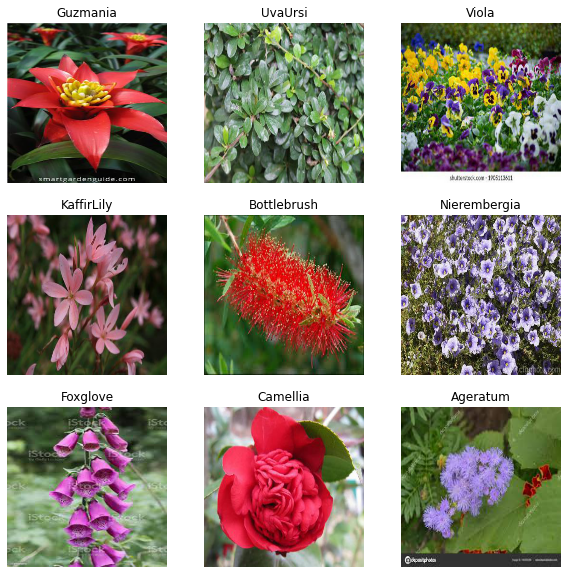

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [18]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 160, 160, 3)
(32,)


In [19]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)

In [20]:
# normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

In [21]:
# normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
# image_batch, labels_batch = next(iter(normalized_ds))
# first_image = image_batch[0]
# # Notice the pixels values are now in `[0,1]`.
# print(np.min(first_image), np.max(first_image))

### 데이터 증강

In [22]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

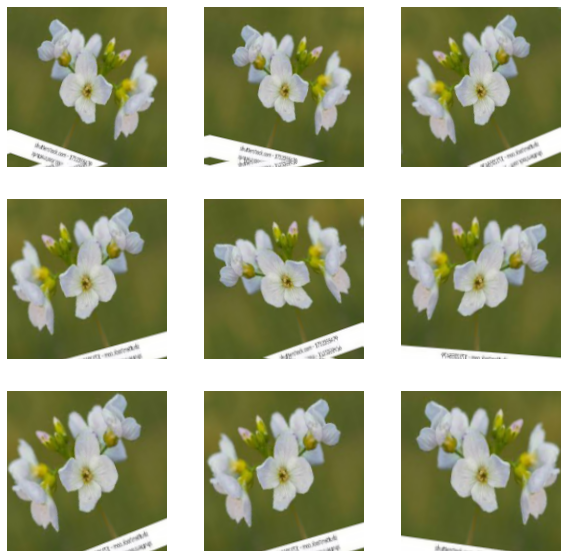

In [23]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

### 드롭아웃(vgg19는 포함되어있음)

In [24]:
# model = Sequential([
#   data_augmentation,
#   layers.experimental.preprocessing.Rescaling(1./255),
#   layers.Conv2D(16, 3, padding='same', activation='relu'),
#   layers.MaxPooling2D(),
#   layers.Conv2D(32, 3, padding='same', activation='relu'),
#   layers.MaxPooling2D(),
#   layers.Conv2D(64, 3, padding='same', activation='relu'),
#   layers.MaxPooling2D(),
#   layers.Dropout(0.2),
#   layers.Flatten(),
#   layers.Dense(128, activation='relu'),
#   layers.Dense(num_classes)
# ])

In [25]:
# model.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])

In [26]:
# model.summary()

### 콜백 설정

In [27]:
preprocess_input = tf.keras.applications.vgg19.preprocess_input

In [28]:
rescale = tf.keras.layers.experimental.preprocessing.Rescaling(1./127.5, offset= -1)

In [29]:
from keras.applications.vgg19 import VGG19
from keras.layers import GlobalAveragePooling2D

img_size = (img_height, img_width)
img_shape = img_size + (3,)
base_model = VGG19(input_shape=img_shape, 
                   include_top=False, 
                   weights='imagenet')
base_model.trainable=False

global_average_layer = GlobalAveragePooling2D()

In [30]:
image_batch, labels_batch = next(iter(train_ds))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

2022-01-24 02:04:14.550703: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8201


(32, 5, 5, 512)


In [ ]:
base_model.summary()

In [31]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 512)


In [32]:
prediction_layer = tf.keras.layers.Dense(299)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 299)


In [33]:
inputs = tf.keras.Input(shape=(img_height, img_width, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [34]:
opt = Adam(lr=1e-6)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=['sparse_categorical_accuracy'])

In [35]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 160, 160, 3)]     0         
_________________________________________________________________
sequential (Sequential)      (None, 160, 160, 3)       0         
_________________________________________________________________
tf.__operators__.getitem (Sl (None, 160, 160, 3)       0         
_________________________________________________________________
tf.nn.bias_add (TFOpLambda)  (None, 160, 160, 3)       0         
_________________________________________________________________
vgg19 (Functional)           (None, 5, 5, 512)         20024384  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0     

In [36]:
len(model.trainable_variables)

2

In [37]:
from keras.callbacks import EarlyStopping , ReduceLROnPlateau

learning_rate_reduction=ReduceLROnPlateau(
                        monitor= "val_loss", 
                        patience = 3, 
                        factor = 0.5, 
                        min_lr=0.0001,
                        verbose=1)

earlystop = EarlyStopping(patience=10)

# 가중치 저장을 위한 checkpoint 만들기 
checkpoint_path = "training1/cp1.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# 모델의 가중치를 저장하는 콜백 만들기
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)


callbacks = [earlystop, learning_rate_reduction, cp_callback]

In [38]:
history = model.fit(
                    train_ds,
                    validation_data=val_ds,
                    epochs=50
                                          )

Epoch 1/50
2899/2899 [==============================] - 110s 38ms/step - loss: 5.9729 - sparse_categorical_accuracy: 0.0044 - val_loss: 5.7032 - val_sparse_categorical_accuracy: 0.0047
Epoch 2/50
2899/2899 [==============================] - 109s 38ms/step - loss: 5.7057 - sparse_categorical_accuracy: 0.0046 - val_loss: 5.7020 - val_sparse_categorical_accuracy: 0.0044
Epoch 3/50
2899/2899 [==============================] - 109s 37ms/step - loss: 5.7029 - sparse_categorical_accuracy: 0.0048 - val_loss: 5.7017 - val_sparse_categorical_accuracy: 0.0050
Epoch 4/50
2899/2899 [==============================] - 110s 38ms/step - loss: 5.7027 - sparse_categorical_accuracy: 0.0040 - val_loss: 5.7017 - val_sparse_categorical_accuracy: 0.0044
Epoch 5/50
2899/2899 [==============================] - 109s 37ms/step - loss: 5.7015 - sparse_categorical_accuracy: 0.0038 - val_loss: 5.7012 - val_sparse_categorical_accuracy: 0.0045
Epoch 6/50
2899/2899 [==============================] - 110s 38ms/step - lo

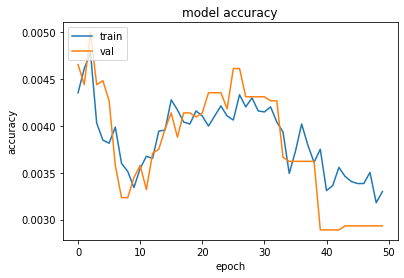

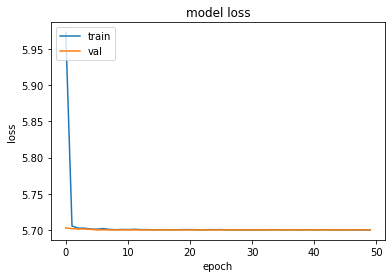

In [43]:
# summarize history for accuracy
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [44]:
from keras.applications.vgg19 import VGG19
from keras.layers import GlobalAveragePooling2D

img_size = (img_height, img_width)
img_shape = img_size + (3,)
base_model = VGG19(input_shape=img_shape, 
                   include_top=False, 
                   weights='imagenet')
base_model.trainable=True

global_average_layer = GlobalAveragePooling2D()

In [45]:
image_batch, labels_batch = next(iter(train_ds))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 5, 5, 512)


In [46]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 512)


In [47]:
prediction_layer = tf.keras.layers.Dense(299)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 299)


In [48]:
inputs = tf.keras.Input(shape=(img_height, img_width, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [49]:
opt = Adam(lr=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=['sparse_categorical_accuracy'])

In [53]:
from keras.callbacks import EarlyStopping , ReduceLROnPlateau

learning_rate_reduction=ReduceLROnPlateau(
                        monitor= "val_loss", 
                        patience = 3, 
                        factor = 0.5, 
                        min_lr=0.0001,
                        verbose=1)

earlystop = EarlyStopping(patience=50)

# 가중치 저장을 위한 checkpoint 만들기 
checkpoint_path = "training1/cp2.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# 모델의 가중치를 저장하는 콜백 만들기
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)


callbacks = [earlystop, learning_rate_reduction, cp_callback]

In [54]:
history = model.fit(
                    train_ds,
                    validation_data=val_ds,
                    epochs=100,
                    callbacks = [callbacks]
                                          )

Epoch 1/100
2899/2899 [==============================] - 266s 92ms/step - loss: 16.8920 - sparse_categorical_accuracy: 0.0034 - val_loss: 17.1796 - val_sparse_categorical_accuracy: 0.0034

Epoch 00001: saving model to training1/cp2.ckpt
Epoch 2/100
2899/2899 [==============================] - 266s 92ms/step - loss: 16.8946 - sparse_categorical_accuracy: 0.0034 - val_loss: 17.1796 - val_sparse_categorical_accuracy: 0.0034

Epoch 00002: saving model to training1/cp2.ckpt
Epoch 3/100
2899/2899 [==============================] - 266s 92ms/step - loss: 16.8976 - sparse_categorical_accuracy: 0.0034 - val_loss: 17.1796 - val_sparse_categorical_accuracy: 0.0034

Epoch 00003: saving model to training1/cp2.ckpt
Epoch 4/100
2899/2899 [==============================] - 266s 92ms/step - loss: 16.8888 - sparse_categorical_accuracy: 0.0034 - val_loss: 17.1796 - val_sparse_categorical_accuracy: 0.0034

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0001.

Epoch 00004: saving model to train

KeyboardInterrupt: 